## Vehicle Detection and Tracking

Here we will apply pre-trained vehicle vs non_vehicle SVM classifier in a sliding window fashion to detect vehicles in the scene.

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# display plot in the notebook
%matplotlib inline

from car_finder import CarFinder

//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Helper Functions

In [2]:
# helper function
def show_image(img, title):
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(title)

## Sliding Windows

//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator SVC from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator PCA from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


CPU times: user 27.8 ms, sys: 10.5 ms, total: 38.2 ms
Wall time: 38.2 ms


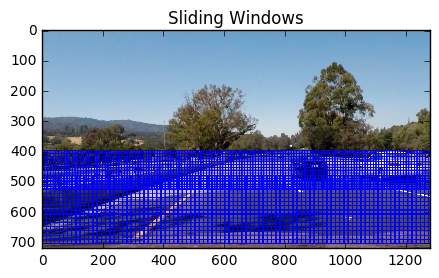

In [3]:
test_fn = '../test_images/test4.jpg'
test_image = mpimg.imread(test_fn)

car_finder = CarFinder()

%time processed_image = car_finder.process_frame(test_image, show_sliding_windows=True)
show_image(processed_image, 'Sliding Windows')

## Detections

CPU times: user 304 ms, sys: 94.4 ms, total: 399 ms
Wall time: 2.6 s


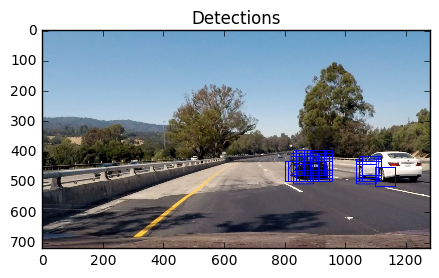

In [4]:
%time processed_image = car_finder.process_frame(test_image, show_detections=True)
show_image(processed_image, 'Detections')

## Heatmap

CPU times: user 311 ms, sys: 116 ms, total: 427 ms
Wall time: 2.63 s


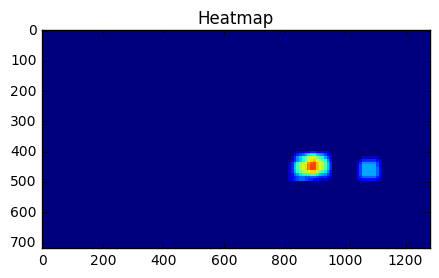

In [5]:
%time processed_image = car_finder.process_frame(test_image, show_heatmap=True)
show_image(processed_image, 'Heatmap')

## Contours

CPU times: user 327 ms, sys: 114 ms, total: 441 ms
Wall time: 2.63 s


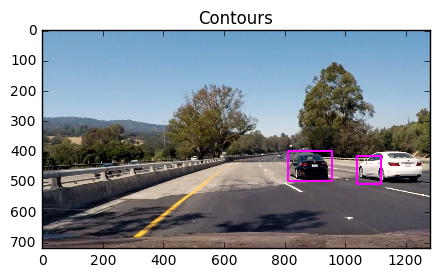

In [6]:
%time processed_image = car_finder.process_frame(test_image, show_contours=True)
show_image(processed_image, 'Contours')

## Process Video

In [3]:
from moviepy.video.io.VideoFileClip import VideoFileClip

car_finder = CarFinder()

input_video = '../videos/short_movie.mp4'
output_video = input_video[:-4] + '_processed.mp4'

video_clip = VideoFileClip(input_video)
processed_clip = video_clip.fl_image(car_finder.process_frame)

# save video
processed_clip.write_videofile(output_video, audio=False)  
print('Done')

[MoviePy] >>>> Building video ../videos/short_movie_processed.mp4
[MoviePy] Writing video ../videos/short_movie_processed.mp4


100%|██████████| 132/132 [01:26<00:00,  1.49it/s]     | 1/132 [00:00<01:26,  1.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../videos/short_movie_processed.mp4 

Done


## Visualize movie

In [6]:
from IPython.display import HTML

print(output_video)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))

../videos/short_movie_processed.mp4
